# Global Power Plant Database
## Problem Statement:
### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

## Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier



## Importing the dataset

In [3]:
os.chdir("C:\github_repo\Files")
df= pd.read_csv('database_IND.csv')   # Reading the data file
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis 

In [4]:
df.shape

(907, 27)

There are 907 rows and 27 columns in my dataset.

In [12]:
#checking of the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source as they are object data type and the ML model needs numeric datatype.

In [13]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can be clearly seen that we have high number of null values in the datasets.

In [14]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id,generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

In [15]:
# Checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

We see that only IND is listed in the country hence there is no impact of this feature on prediction

In [16]:
# Checking the count of the country_long
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [17]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [18]:
# Checking the count of other_fuel2
df["other_fuel2"].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

We can see that only Oil is listed in the other_fuel2 and rest are all 906 null values hence there is no impact of this feature on prediction

In [19]:
# Checking the count of year_of_capacity_data
df["year_of_capacity_data"].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [20]:
# Checking the count of generation_data_source
df["generation_data_source"].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [21]:
# Checking the count of other_fuel3
df["other_fuel3"].value_counts()

Series([], Name: other_fuel3, dtype: int64)

other_fuel3 has all values as null values hence dropping this column

In [22]:
# Checking the count of wepp_id
df["wepp_id"].value_counts()

Series([], Name: wepp_id, dtype: int64)

wepp_id has all values as null values hence dropping this column

In [23]:
# Checking the count of generation_gwh_2013
df["generation_gwh_2013"].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

In [24]:
# Checking the count of generation_gwh_2019
df["generation_gwh_2019"].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

In [25]:
# Checking the count of generation_gwh_2019
df["estimated_generation_gwh"].value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

In [26]:
df.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"])

,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [27]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,commissioning_year,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'Fuel_Type', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh'],
      dtype='object')

In [29]:
# Checking the count of name
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [30]:
# Checking the count of gppd_idnr
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [31]:
# Checking the count of owner
df["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [32]:
# Checking the count of url
df["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [33]:
df.drop(columns=["name","gppd_idnr","owner","url"],axis=1,inplace=True)

In [34]:
df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,geolocation_source,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,WRI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,CDM,WRI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,Central Electricity Authority,WRI,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,Central Electricity Authority,WRI,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,Central Electricity Authority,WRI,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Industry About,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,CDM,WRI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,WRI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.shape

(907, 21)

In [36]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
source                        0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

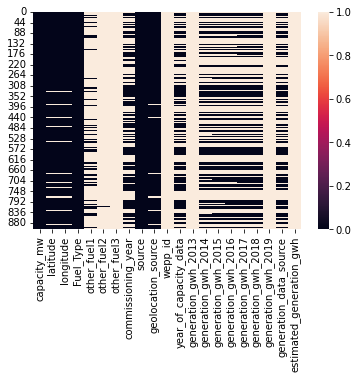

In [37]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

We can clearly observe the white lines in the heat map which indicates the missing values in the dataset.

In [38]:
#Checking the skewness of the dataset
df.skew().sort_values()

commissioning_year         -1.067949
latitude                   -0.145866
year_of_capacity_data       0.000000
longitude                   1.112646
capacity_mw                 3.123576
generation_gwh_2014         3.342707
generation_gwh_2018         3.476298
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2015         3.665904
other_fuel3                      NaN
wepp_id                          NaN
generation_gwh_2013              NaN
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

In [39]:
# Checking the count of other_fuel1
df["other_fuel1"].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

## Treating null values using imputation techniques

In [40]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'commissioning_year', 'source',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [41]:
#checking the mean of latitude
df['latitude'].mean()

21.19791811846691

In [42]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [43]:
#checking the mode of geolocation_source columns
df["geolocation_source"].mode()

0    WRI
dtype: object

## Filling the null values

In [44]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [45]:
# checking for missing values after imputation.
df.isnull().sum()

capacity_mw                   0
latitude                      0
longitude                     0
Fuel_Type                     0
other_fuel1                   0
other_fuel2                 906
other_fuel3                 907
commissioning_year            0
source                        0
geolocation_source            0
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

##  HEAT MAP

<AxesSubplot:>

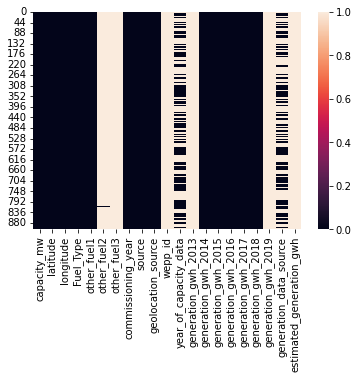

In [46]:
# Heatmap
sns.heatmap(df.isnull())

We can see there is no null values now.

In [47]:
#Getting the columns in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'commissioning_year', 'source',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [48]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [49]:
# Checking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

In [50]:
# Checking the uniqueness of primary_fuel
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [51]:
# Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [53]:

# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

In [54]:
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,source,geolocation_source,wepp_id,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,NaN,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,Ultratech Cement ltd,WRI,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
2,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,CDM,WRI,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
3,135.0,23.8712,91.3602,Gas,Oil,NaN,NaN,Central Electricity Authority,WRI,NaN,...,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,Central Electricity Authority,WRI,NaN,...,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,3.0


## Statistical View

In [55]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh,Power_plant_age
count,907.000000,907.000000,907.000000,0.0,0.0,519.0,0.0,907.000000,907.000000,907.000000,907.000000,907.000000,0.0,0.0,907.000000
mean,326.223755,21.197918,77.427103,NaN,NaN,2019.0,NaN,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,NaN,NaN,19.271224
std,590.085456,6.079148,4.815073,NaN,NaN,0.0,NaN,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,NaN,NaN,13.158621
min,0.000000,8.168900,68.644700,NaN,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,16.725000,17.072000,74.388900,NaN,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,15.000000
50%,59.200000,21.281800,76.719500,NaN,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,17.000000
75%,385.250000,25.176450,79.206100,NaN,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,20.000000
max,4760.000000,34.649000,95.408000,NaN,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN,91.000000


In [56]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_Type', 'other_fuel1', 'other_fuel2', 'source', 'geolocation_source', 'generation_data_source']


In [57]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col) 

['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh', 'Power_plant_age']


## Data Visualization

In [58]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'source', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh', 'Power_plant_age'],
      dtype='object')

## Univariate Analysis

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


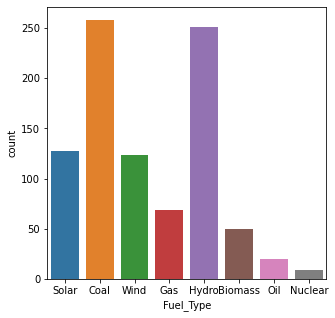

In [59]:
print(df['Fuel_Type'].value_counts())   #visualizing the fuel types in Fuel_Type
plt.figure(figsize=(5,5))
sns.countplot(df['Fuel_Type'])
plt.show()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


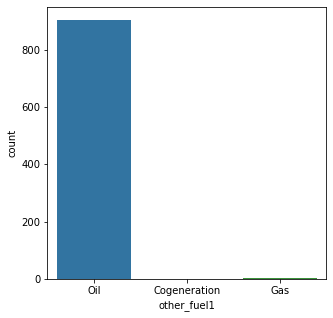

In [60]:
#checking the count of fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


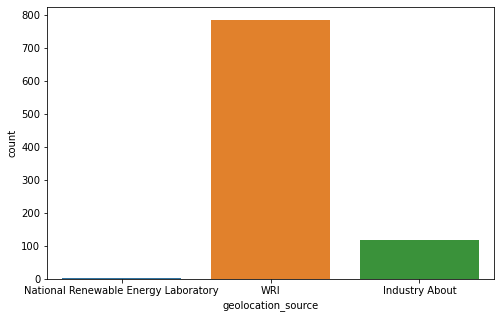

In [61]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


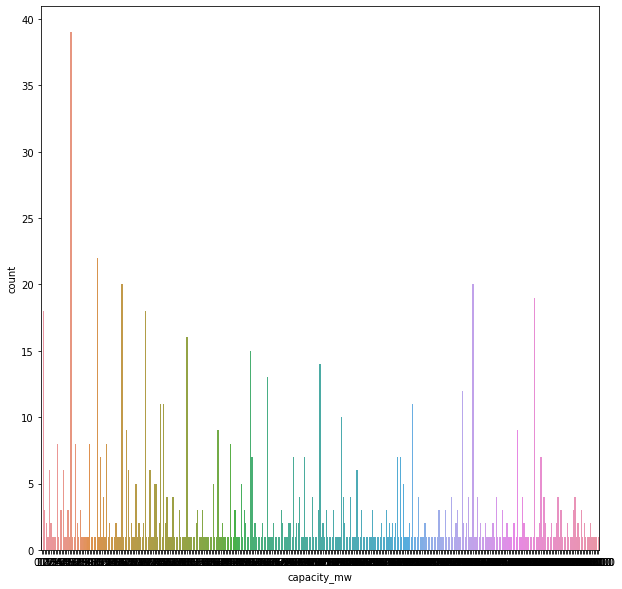

In [62]:
print(df['capacity_mw'].value_counts())   #visualizing the capacity_mw
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

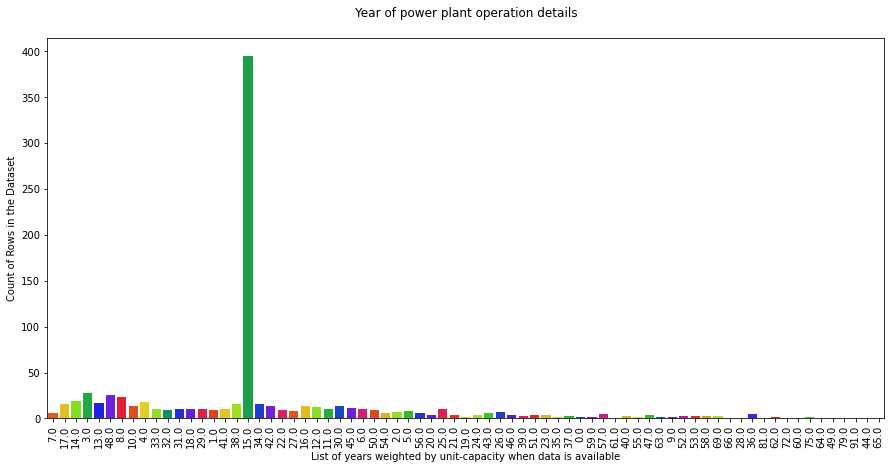

In [63]:
plt.figure(figsize=(15,7))
values = list(df['Power_plant_age'].unique())
diag = sns.countplot(df["Power_plant_age"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

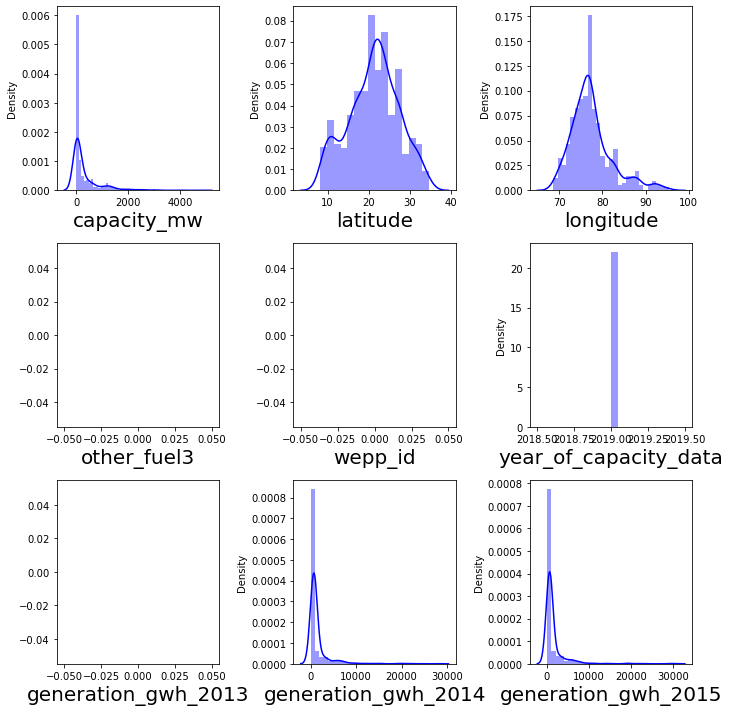

In [64]:
# hecking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

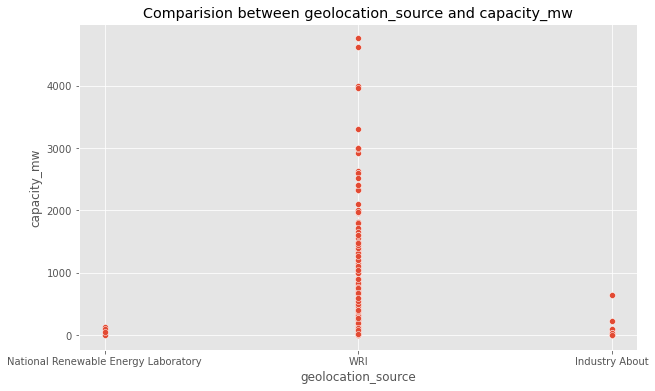

In [65]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

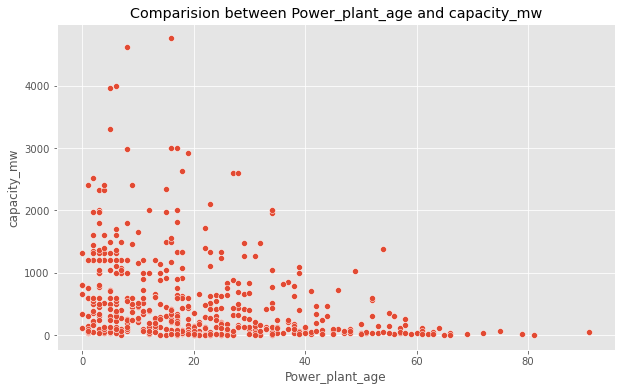

In [66]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

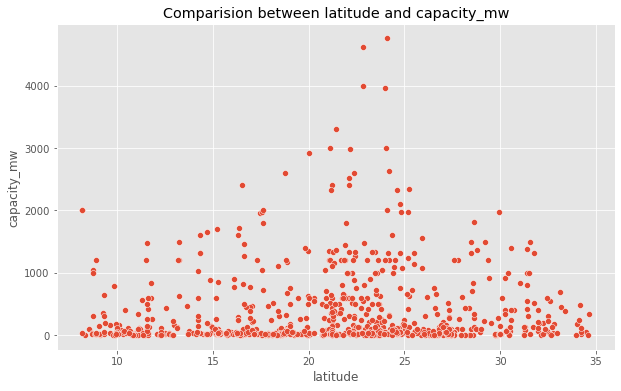

In [67]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

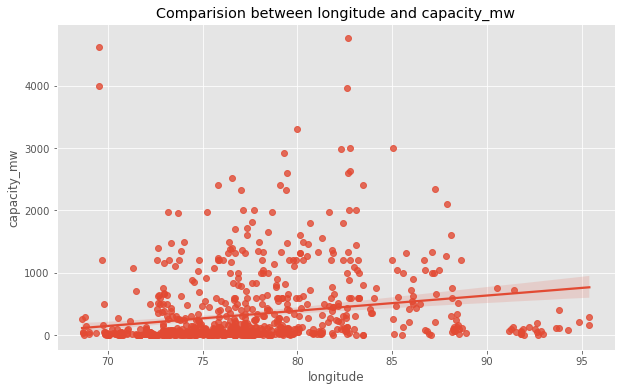

In [68]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);


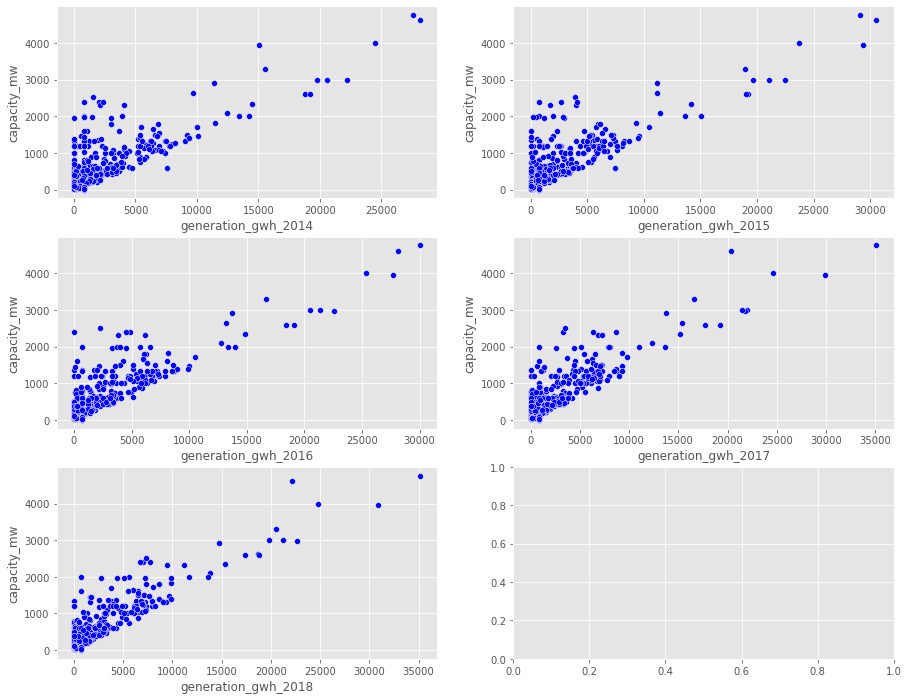

In [69]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[2,0],data=df,color="b")
plt.show()

This features shows a positive correlation. Here the electricity generation reported for the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

## Correlation between features and target 'Fuel_Types'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='Fuel_Type'>

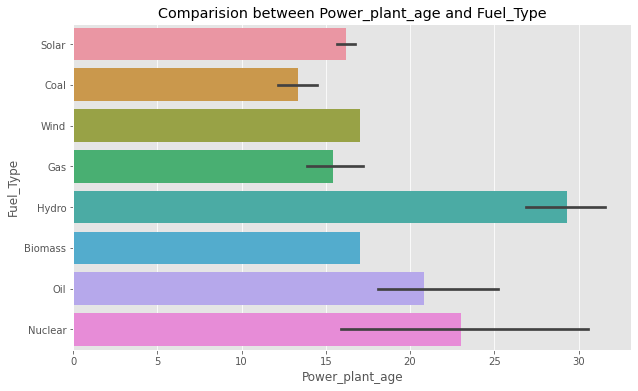

In [70]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(df['Power_plant_age'],df["Fuel_Type"])

<AxesSubplot:title={'center':'Comparision between latitude and Fuel_Type'}, xlabel='latitude', ylabel='Fuel_Type'>

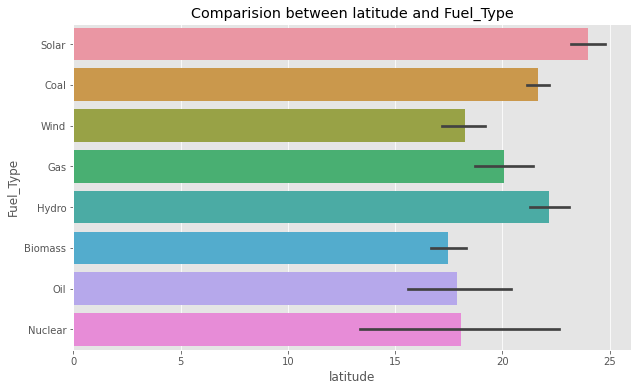

In [71]:
# Checking the relation between feature latitude and targer Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['latitude'],df["Fuel_Type"])

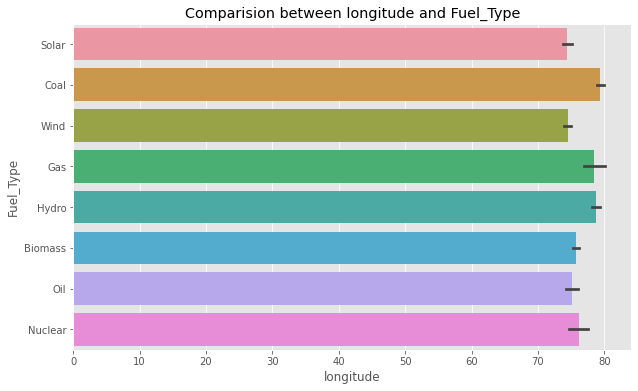

In [72]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.barplot(df['longitude'],df["Fuel_Type"]);

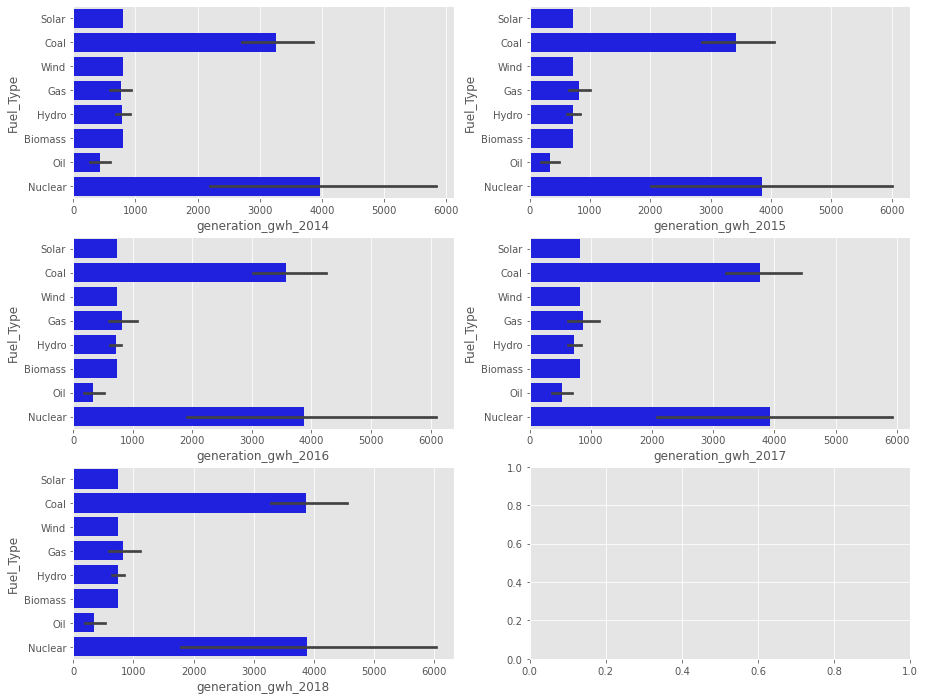

In [73]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer Fuel_Type
sns.barplot(x = "generation_gwh_2014", y = "Fuel_Type",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2018',y='Fuel_Type',ax=axes[2,0],data=df,color="b")
plt.show()

## Checking the relationship between both the targets

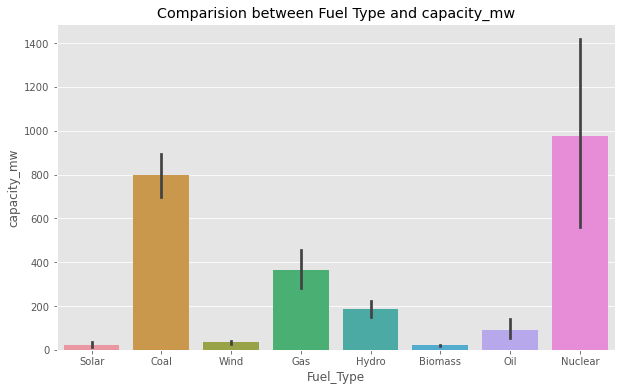

In [74]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

## Label Encoding

In [75]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [76]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [77]:
df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


In [78]:
df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,source,geolocation_source,wepp_id,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Power_plant_age
0,2.5,28.1839,73.2407,6,2,NaN,NaN,109,1,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,2,NaN,NaN,174,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
2,39.2,21.9038,69.3732,7,2,NaN,NaN,21,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
3,135.0,23.8712,91.3602,2,2,NaN,NaN,22,2,NaN,...,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,NaN,NaN,22,2,NaN,...,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,NaN,NaN,22,2,NaN,...,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,2.0
903,3.0,12.8932,78.1654,6,2,NaN,NaN,77,0,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
904,25.5,15.2758,75.5811,7,2,NaN,NaN,21,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
905,80.0,24.3500,73.7477,1,2,NaN,NaN,59,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0


##  Identifying the outliers

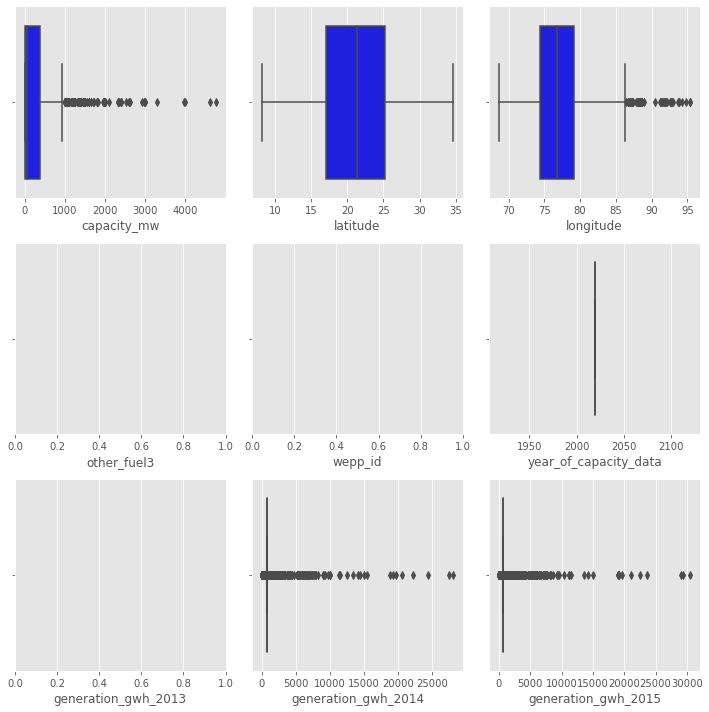

In [79]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method.

In [80]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'source', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh', 'Power_plant_age'],
      dtype='object')

In [81]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','Power_plant_age']]

In [83]:
z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [84]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,source,geolocation_source,wepp_id,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Power_plant_age
0,2.5,28.1839,73.2407,6,2,NaN,NaN,109,1,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,2,NaN,NaN,174,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
2,39.2,21.9038,69.3732,7,2,NaN,NaN,21,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
3,135.0,23.8712,91.3602,2,2,NaN,NaN,22,2,NaN,...,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,NaN,NaN,22,2,NaN,...,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,NaN,NaN,22,2,NaN,...,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,2.0
903,3.0,12.8932,78.1654,6,2,NaN,NaN,77,0,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
904,25.5,15.2758,75.5811,7,2,NaN,NaN,21,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
905,80.0,24.3500,73.7477,1,2,NaN,NaN,59,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0


In [85]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,source,geolocation_source,wepp_id,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Power_plant_age
0,2.5,28.1839,73.2407,6,2,NaN,NaN,109,1,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,2,NaN,NaN,174,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
2,39.2,21.9038,69.3732,7,2,NaN,NaN,21,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
3,135.0,23.8712,91.3602,2,2,NaN,NaN,22,2,NaN,...,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,NaN,NaN,22,2,NaN,...,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,NaN,NaN,22,2,NaN,...,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,2.0
903,3.0,12.8932,78.1654,6,2,NaN,NaN,77,0,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
904,25.5,15.2758,75.5811,7,2,NaN,NaN,21,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
905,80.0,24.3500,73.7477,1,2,NaN,NaN,59,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0


In [86]:
df.shape

(907, 21)

In [87]:
new_df.shape

(851, 21)

In [88]:
print("total_dropped_rows",df.shape[0] - new_df.shape[0])

total_dropped_rows 56


## Percentage data loss 

In [89]:
loss_percent=(907-851)/907*100
print(loss_percent,'%')

6.174200661521499 %


## Correlation between the target variable and features 

In [90]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel3,source,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,NaN,-0.275724,0.234543,NaN,NaN,NaN,0.620202,0.680949,0.750088,0.788972,0.815198,NaN,NaN,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,NaN,0.069430,-0.203340,NaN,NaN,NaN,0.081661,0.071346,0.057301,0.071296,0.064558,NaN,NaN,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,NaN,-0.235719,0.263739,NaN,NaN,NaN,0.119473,0.154522,0.195299,0.196529,0.204421,NaN,NaN,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,NaN,0.038558,-0.478601,NaN,NaN,NaN,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,NaN,NaN,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,NaN,0.028471,-0.022827,NaN,NaN,NaN,-0.000530,0.006092,0.015479,0.011842,0.022700,NaN,NaN,-0.058103
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,NaN,1.000000,-0.497893,NaN,NaN,NaN,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,NaN,NaN,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,NaN,-0.497893,1.000000,NaN,NaN,NaN,0.113446,0.125329,0.127128,0.125199,0.132477,NaN,NaN,0.051608
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'Fuel_Type'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'other_fuel3'),
  Text(0, 6.5, 'source'),
  Text(0, 7.5, 'geolocation_source'),
  Text(0, 8.5, 'wepp_id'),
  Text(0, 9.5, 'year_of_capacity_data'),
  Text(0, 10.5, 'generation_gwh_2013'),
  Text(0, 11.5, 'generation_gwh_2014'),
  Text(0, 12.5, 'generation_gwh_2015'),
  Text(0, 13.5, 'generation_gwh_2016'),
  Text(0, 14.5, 'generation_gwh_2017'),
  Text(0, 15.5, 'generation_gwh_2018'),
  Text(0, 16.5, 'generation_gwh_2019'),
  Text(0, 17.5, 'estimated_generation_gwh'),
  Text(0, 18.5, 'Power_plant_age')])

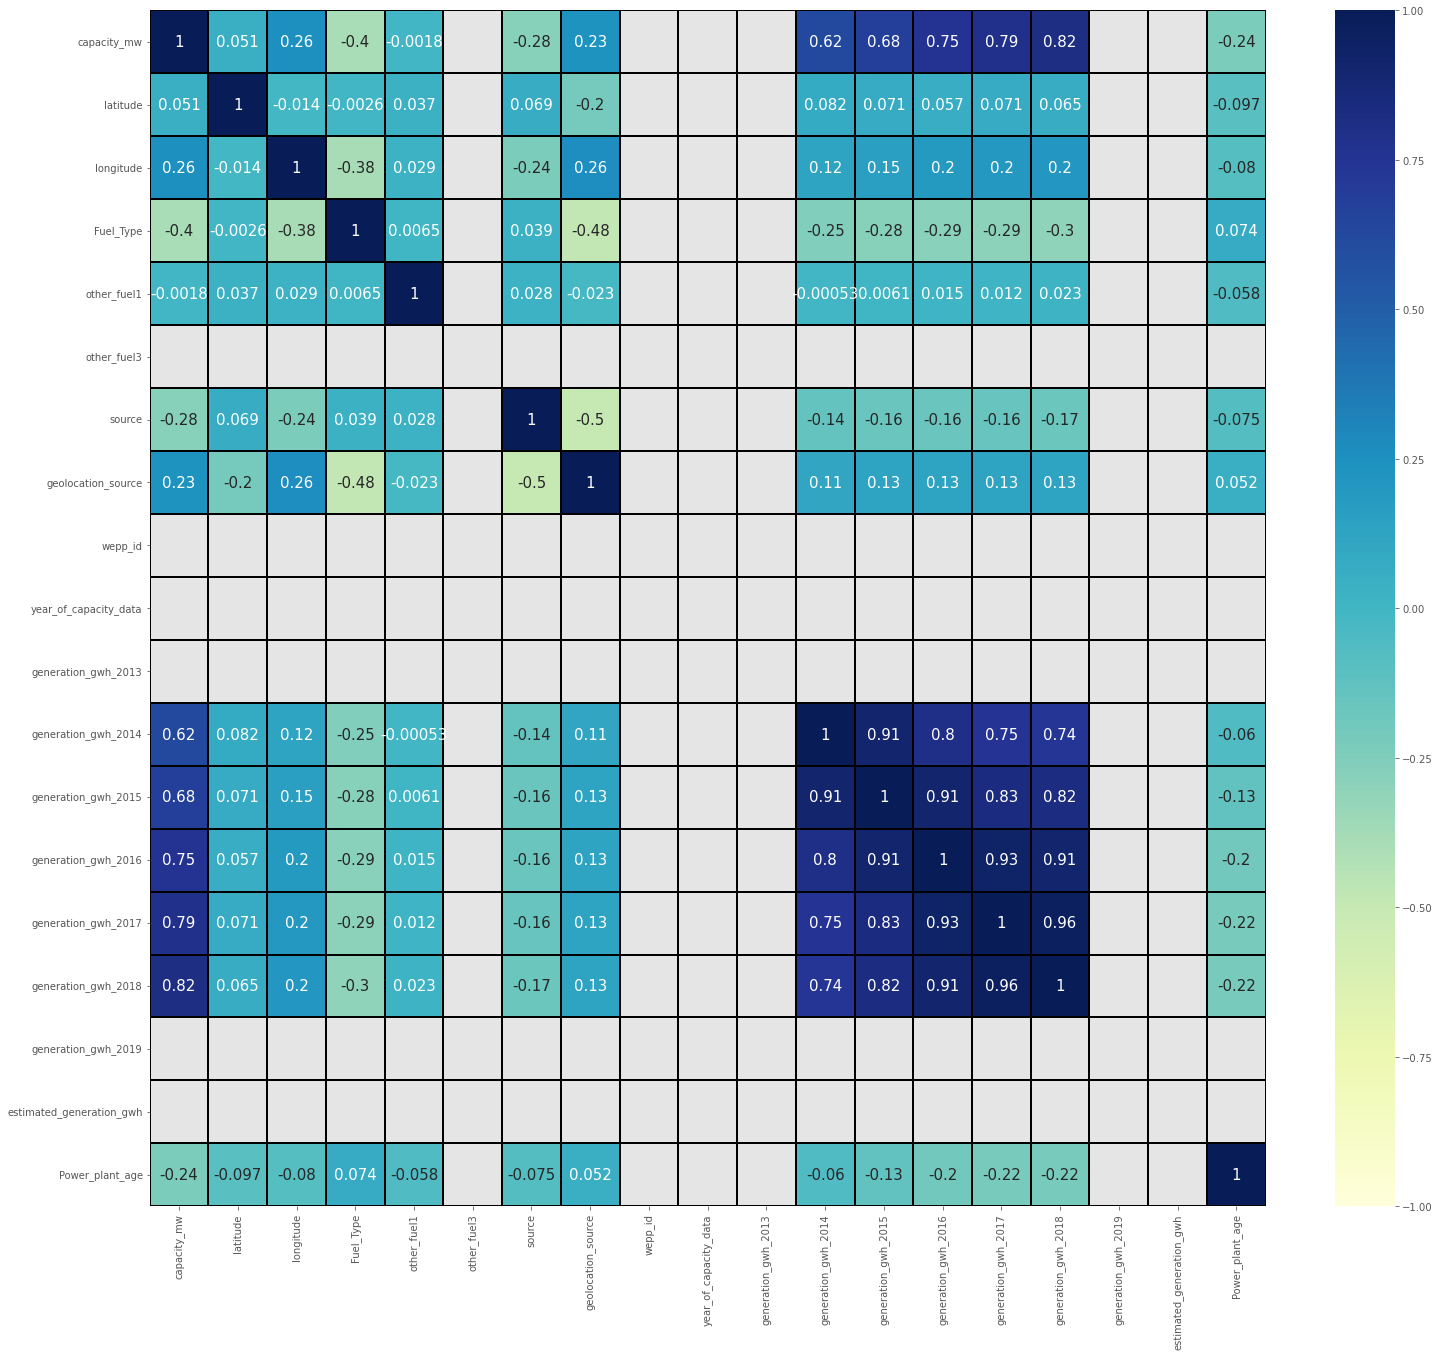

In [91]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [92]:
new_df.corr()['Fuel_Type'].sort_values()

geolocation_source         -0.478601
capacity_mw                -0.398039
longitude                  -0.382975
generation_gwh_2018        -0.298364
generation_gwh_2017        -0.289232
generation_gwh_2016        -0.286624
generation_gwh_2015        -0.276308
generation_gwh_2014        -0.250101
latitude                   -0.002561
other_fuel1                 0.006463
source                      0.038558
Power_plant_age             0.074358
Fuel_Type                   1.000000
other_fuel3                      NaN
wepp_id                          NaN
year_of_capacity_data            NaN
generation_gwh_2013              NaN
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
Name: Fuel_Type, dtype: float64

In [93]:
new_df.corr()['capacity_mw'].sort_values()

Fuel_Type                  -0.398039
source                     -0.275724
Power_plant_age            -0.241487
other_fuel1                -0.001758
latitude                    0.050588
geolocation_source          0.234543
longitude                   0.257582
generation_gwh_2014         0.620202
generation_gwh_2015         0.680949
generation_gwh_2016         0.750088
generation_gwh_2017         0.788972
generation_gwh_2018         0.815198
capacity_mw                 1.000000
other_fuel3                      NaN
wepp_id                          NaN
year_of_capacity_data            NaN
generation_gwh_2013              NaN
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
Name: capacity_mw, dtype: float64

## Visualizing the correlation between label and features using bar plot

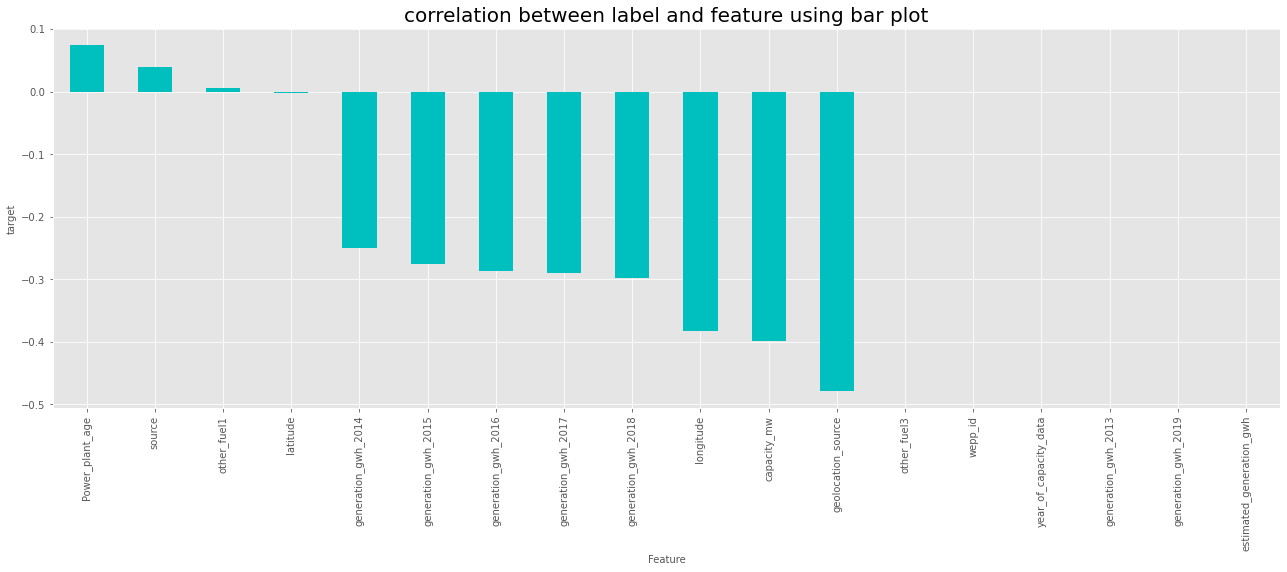

In [94]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

## MultiCollinearity with Variance Inflation Factor

In [95]:
df1=pd.DataFrame(data=new_df)       # copying the dataframe
df1

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,source,geolocation_source,wepp_id,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Power_plant_age
0,2.5,28.1839,73.2407,6,2,NaN,NaN,109,1,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,2,NaN,NaN,174,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
2,39.2,21.9038,69.3732,7,2,NaN,NaN,21,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
3,135.0,23.8712,91.3602,2,2,NaN,NaN,22,2,NaN,...,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,NaN,NaN,22,2,NaN,...,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,NaN,NaN,22,2,NaN,...,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,2.0
903,3.0,12.8932,78.1654,6,2,NaN,NaN,77,0,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
904,25.5,15.2758,75.5811,7,2,NaN,NaN,21,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
905,80.0,24.3500,73.7477,1,2,NaN,NaN,59,2,NaN,...,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0


In [96]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [97]:
x1

,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,source,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Power_plant_age
0,28.1839,73.2407,6,2,NaN,NaN,109,1,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,7.0
1,24.7663,74.6090,1,2,NaN,NaN,174,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
2,21.9038,69.3732,7,2,NaN,NaN,21,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
3,23.8712,91.3602,2,2,NaN,NaN,22,2,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,14.0
4,21.9603,82.4091,1,2,NaN,NaN,22,2,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2,NaN,NaN,22,2,NaN,2019.0,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,2.0
903,12.8932,78.1654,6,2,NaN,NaN,77,0,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
904,15.2758,75.5811,7,2,NaN,NaN,21,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
905,24.3500,73.7477,1,2,NaN,NaN,59,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0


In [98]:
y1

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 851, dtype: float64

In [99]:
x1.shape

(851, 20)

In [100]:
y1.shape

(851,)

In [101]:
x1.shape[1]    # 12 number of columns

20

In [116]:
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [6]:
calc_vif(x1)

NameError: name 'x1' is not defined

In [7]:
x1=df1.drop(['other_fuel1'],axis=1)

NameError: name 'df1' is not defined

In [120]:
calc_vif(x1)

TypeError: '>=' not supported between instances of 'float' and 'str'

In [8]:
x1=df1.drop(['other_fuel1','latitude'],axis=1)

NameError: name 'df1' is not defined

In [9]:
calc_vif(x1)

NameError: name 'x1' is not defined

## Feature selection by dropping columns

In [10]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

NameError: name 'new_df' is not defined

In [122]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,other_fuel2,other_fuel3,source,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Power_plant_age
0,2.5,73.2407,6,NaN,NaN,109,1,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,7.0
1,98.0,74.6090,1,NaN,NaN,174,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
2,39.2,69.3732,7,NaN,NaN,21,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
3,135.0,91.3602,2,NaN,NaN,22,2,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,14.0
4,1800.0,82.4091,1,NaN,NaN,22,2,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,3.0


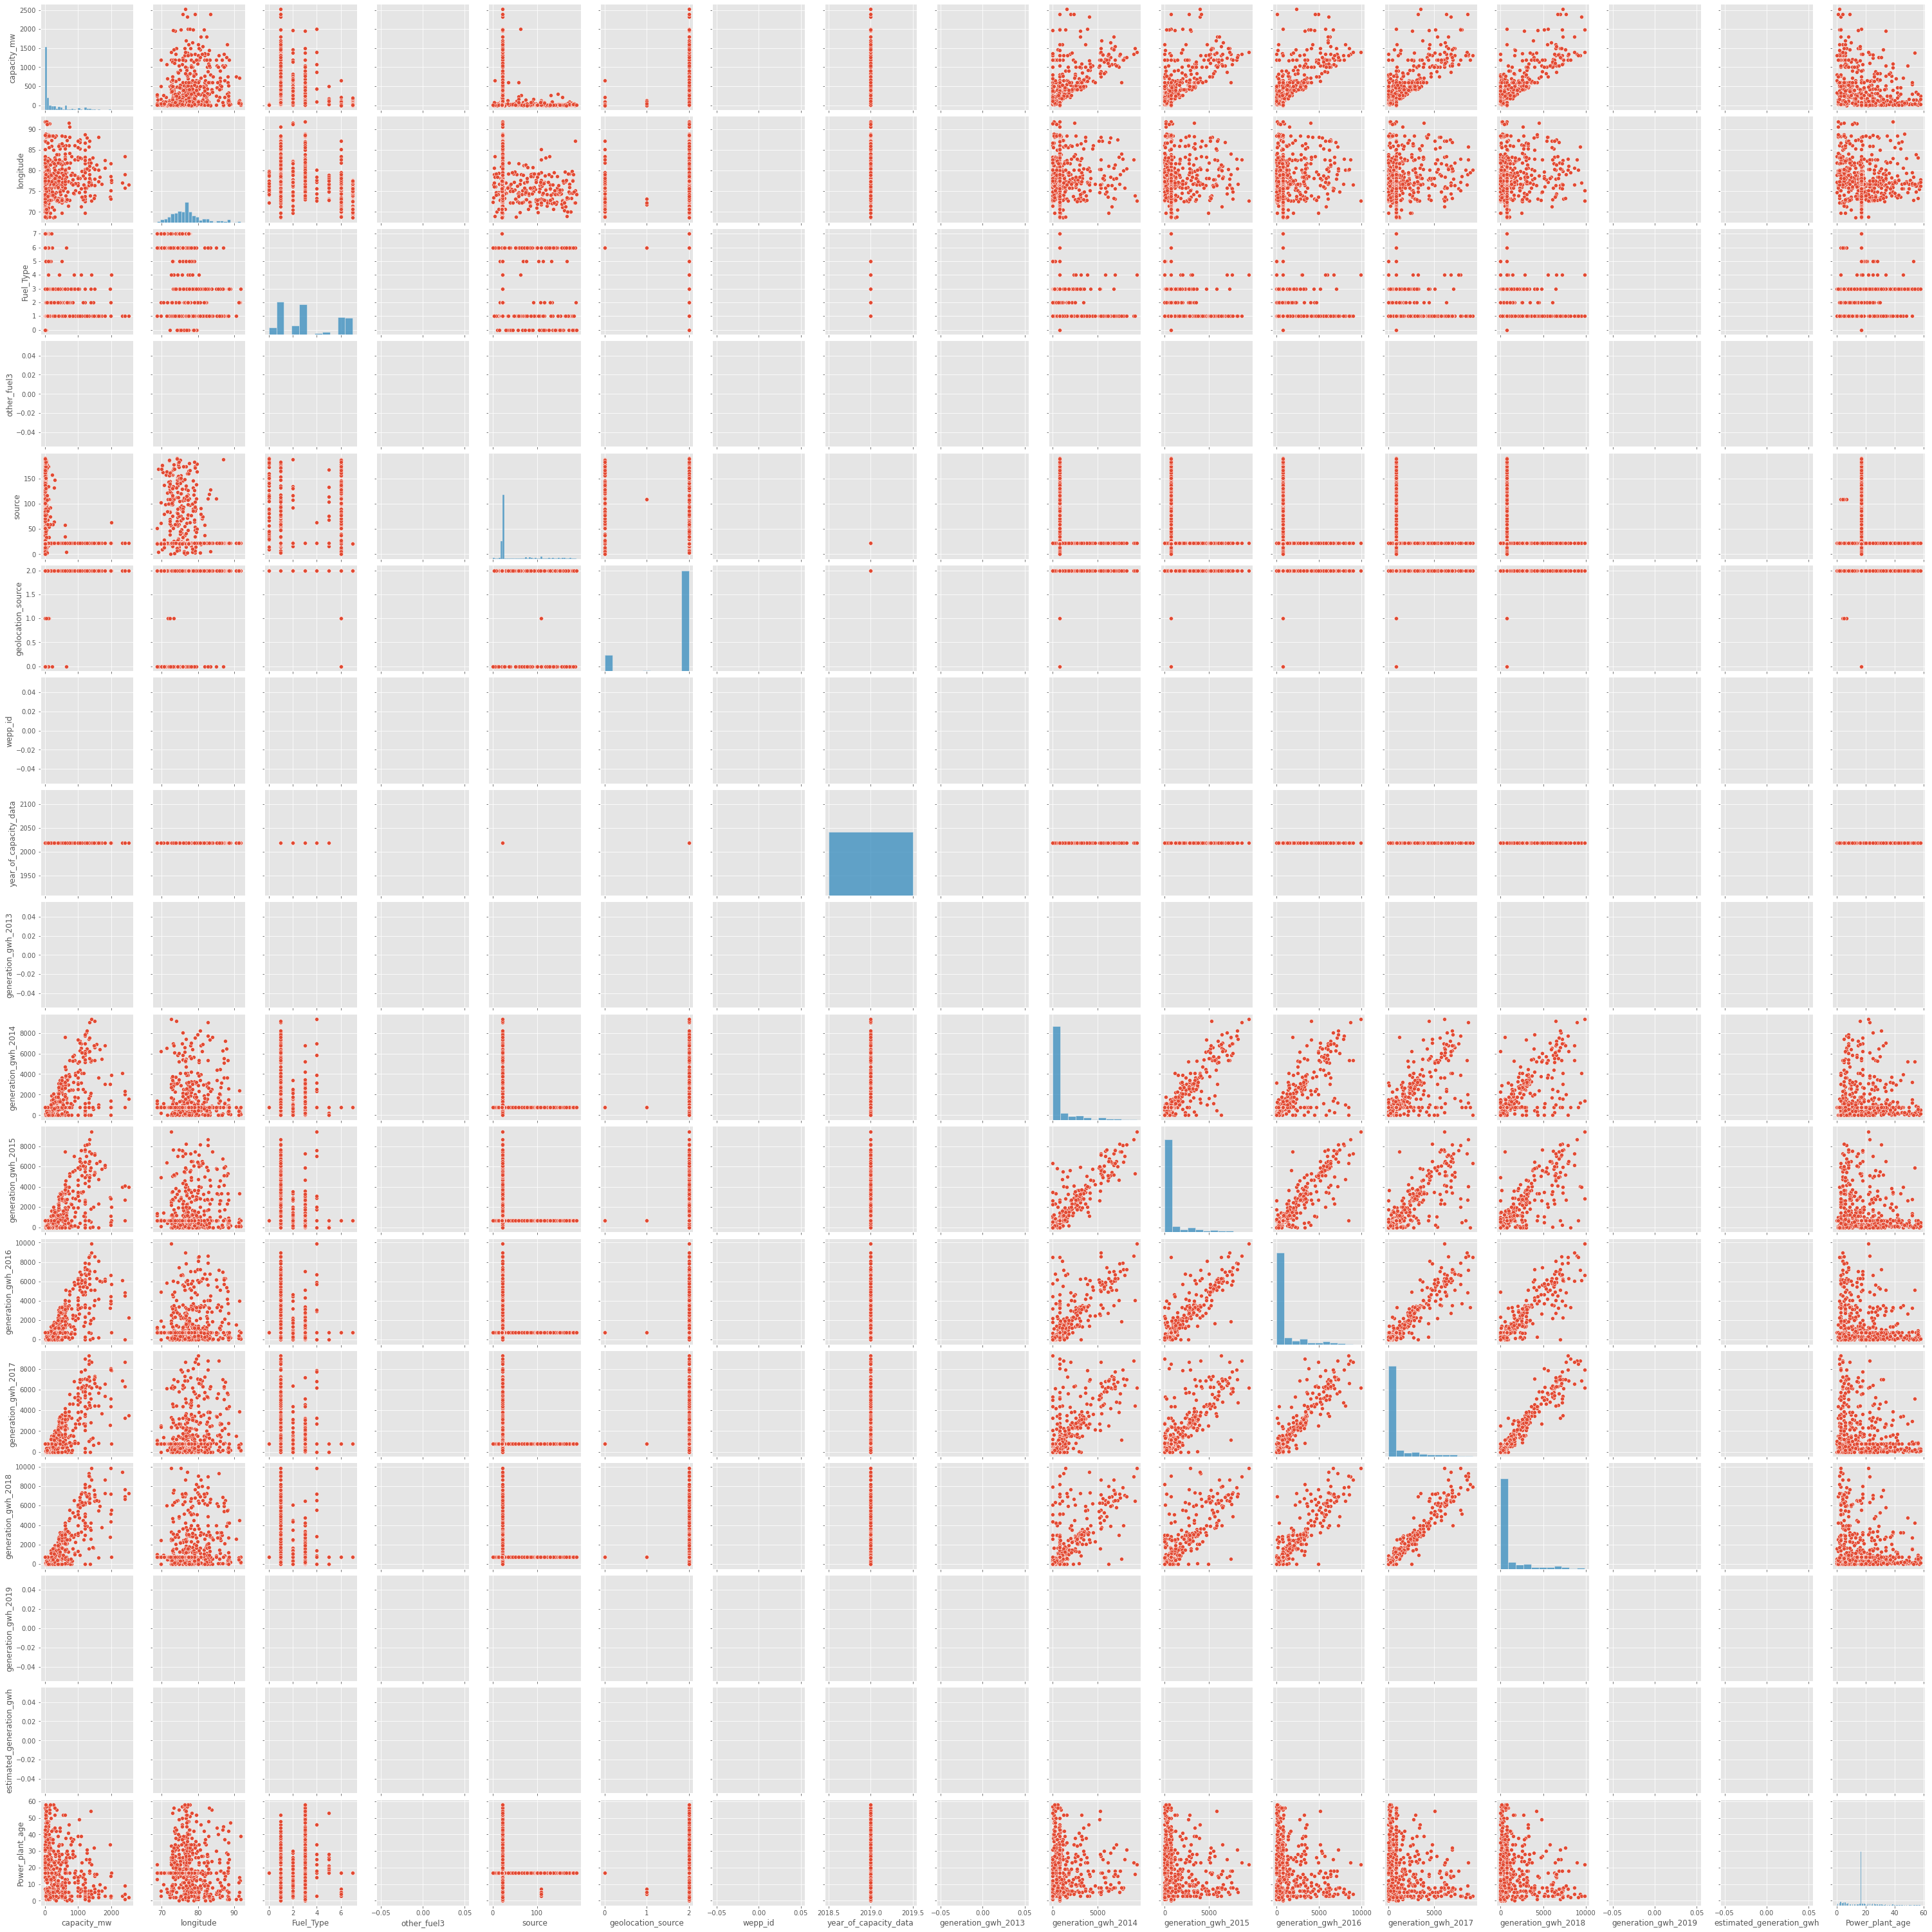

In [123]:
sns.pairplot(new_df)

## Machine Learning 

## Predicting "Capacity_mw" Target 

In [124]:
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

In [125]:
x.shape

(851, 18)

In [126]:
y.shape

(851,)

In [127]:
x

,longitude,Fuel_Type,other_fuel2,other_fuel3,source,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Power_plant_age
0,73.2407,6,NaN,NaN,109,1,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,7.0
1,74.6090,1,NaN,NaN,174,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
2,69.3732,7,NaN,NaN,21,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
3,91.3602,2,NaN,NaN,22,2,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,14.0
4,82.4091,1,NaN,NaN,22,2,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,77.3568,1,NaN,NaN,22,2,NaN,2019.0,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,2.0
903,78.1654,6,NaN,NaN,77,0,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
904,75.5811,7,NaN,NaN,21,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0
905,73.7477,1,NaN,NaN,59,2,NaN,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN,17.0


In [128]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 851, dtype: float64

## Checking for skewness

In [129]:
x.skew().sort_values()

geolocation_source         -2.066536
year_of_capacity_data       0.000000
Fuel_Type                   0.413759
longitude                   0.945877
Power_plant_age             1.280800
source                      1.734252
generation_gwh_2017         2.546541
generation_gwh_2018         2.597029
generation_gwh_2016         2.645786
generation_gwh_2015         2.714999
generation_gwh_2014         2.943026
other_fuel3                      NaN
wepp_id                          NaN
generation_gwh_2013              NaN
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

## Removing skewness using yeo-johnson method

In [130]:
from sklearn.preprocessing import PowerTransformer
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
transf = PowerTransformer(method='yeo-johnson')

In [131]:
x[skew] = transf.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [132]:
x.skew()

longitude                  -0.000128
Fuel_Type                   0.413759
other_fuel3                      NaN
source                      1.734252
geolocation_source         -2.066536
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         0.232399
generation_gwh_2015         0.163587
generation_gwh_2016         0.147035
generation_gwh_2017         0.127152
generation_gwh_2018         0.133691
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
Power_plant_age             0.043734
dtype: float64

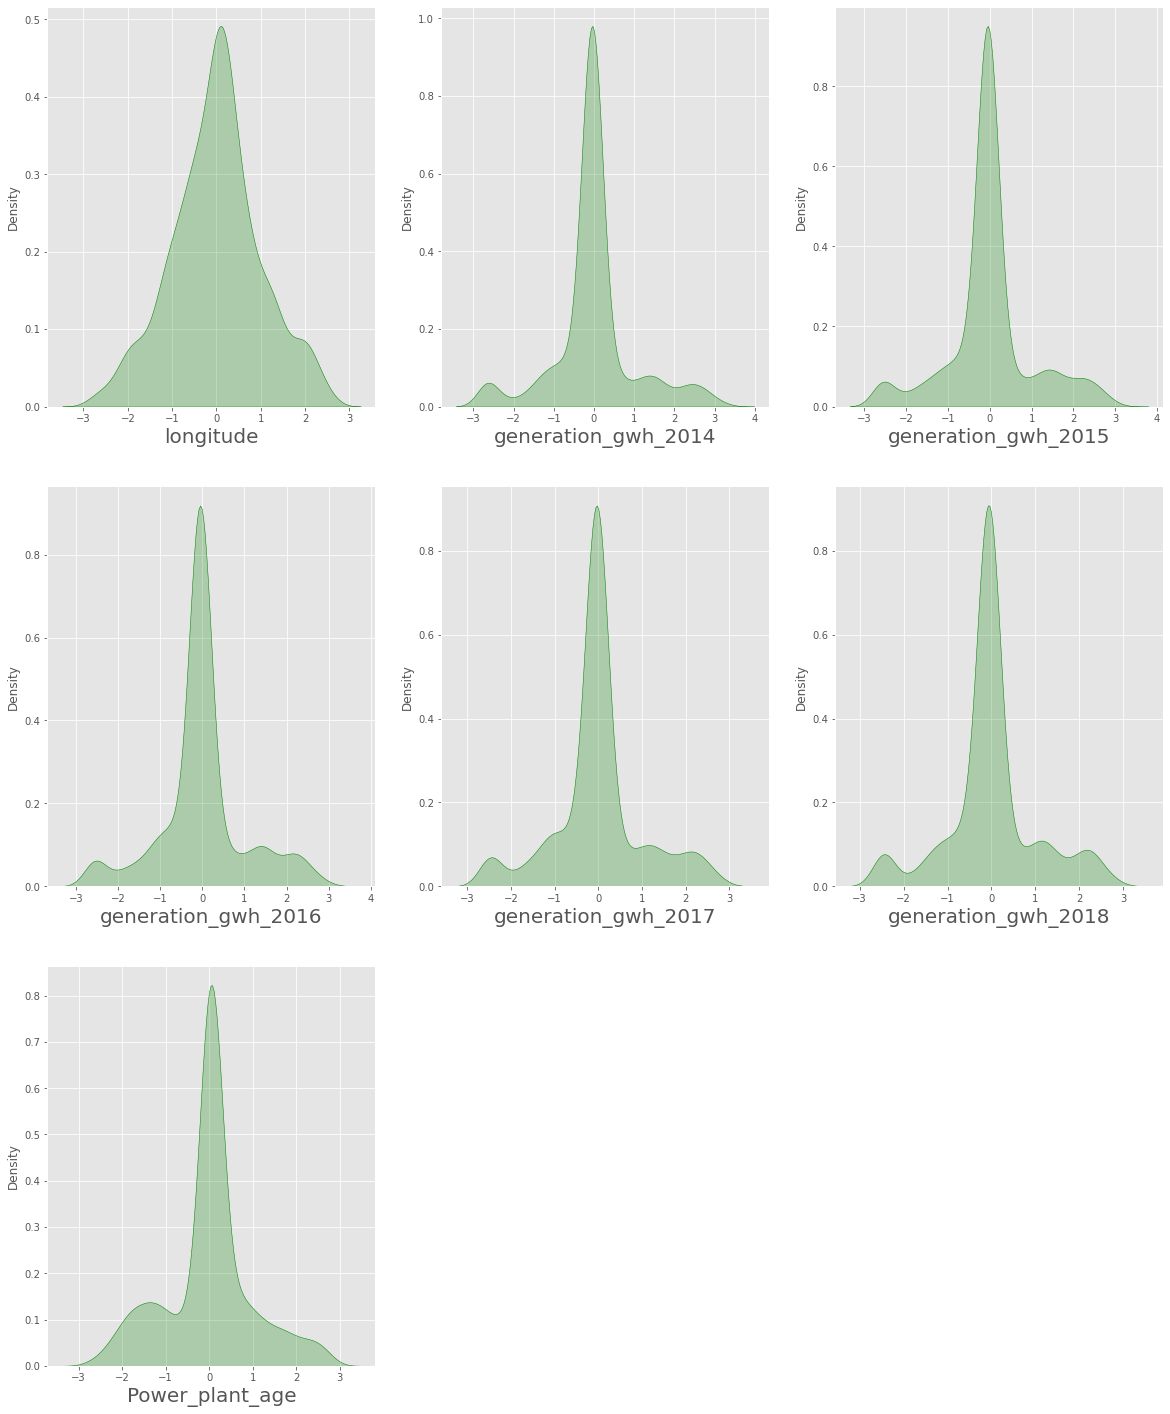

In [133]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Feature Scalling

In [135]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

ValueError: could not convert string to float: 'Oil'

## MultiCollinearity with Variance Inflation Factor 

In [136]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

TypeError: '>=' not supported between instances of 'float' and 'str'

## Finding best random state 

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split